In [1]:
import sys
sys.path.append("../..")
from IPython.display import display
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import magine.ontology.enrichment_tools as et
from magine.plotting.heatmaps import  heatmap_from_array
from magine.plotting.wordcloud_tools import create_wordcloud
from magine.plotting.venn_diagram_maker import create_venn2
import seaborn as sns
from magine.data.tools import pivot_table
from magine.plotting.species_plotting import plot_list_of_genes
from magine.data.tools import log2_normalize_df

# load the experimental data
from exp_data import exp_data

# Visualize experimental data


In [3]:
display(exp_data.create_table_of_data())
display(exp_data.create_table_of_data(sig=True))
display(exp_data.create_table_of_data(sig=True, unique=True))

time,01hr,06hr,24hr,48hr,Total Unique Across
data_type,,,,,
C18,528.0,228.0,658.0,688,1411
HILIC,473.0,607.0,935.0,618,1512
label_free,3135.0,3091.0,2735.0,2504,4036
ph_silac,6903.0,10956.0,12176.0,11183,21924
rna_seq,18741.0,19104.0,19992.0,-,20642
silac,2923.0,3357.0,3072.0,3265,4086


time,01hr,06hr,24hr,48hr,Total Unique Across
data_type,,,,,
C18,528.0,228.0,658.0,688,1411
HILIC,473.0,607.0,935.0,618,1512
label_free,201.0,46.0,281.0,911,1149
ph_silac,594.0,1370.0,2414.0,1368,4757
rna_seq,73.0,1999.0,12215.0,-,12340
silac,38.0,52.0,228.0,266,485


time,01hr,06hr,24hr,48hr,Total Unique Across
data_type,,,,,
C18,527.0,227.0,657.0,687,1410
HILIC,472.0,606.0,934.0,617,1511
label_free,196.0,46.0,271.0,874,1085
ph_silac,514.0,888.0,1227.0,851,2278
rna_seq,73.0,1999.0,12215.0,-,12340
silac,38.0,52.0,228.0,266,485


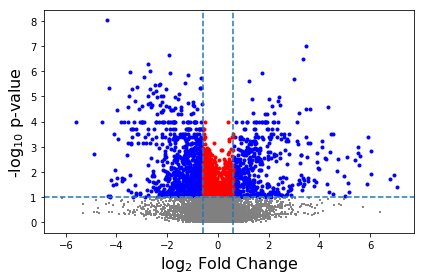

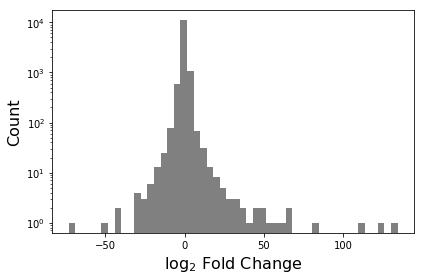

In [4]:
v_plot = exp_data.volcano_plot('label_free', 'lf_volcano')
hist_plot = exp_data.create_histogram_measurements('label_free', 'hist')

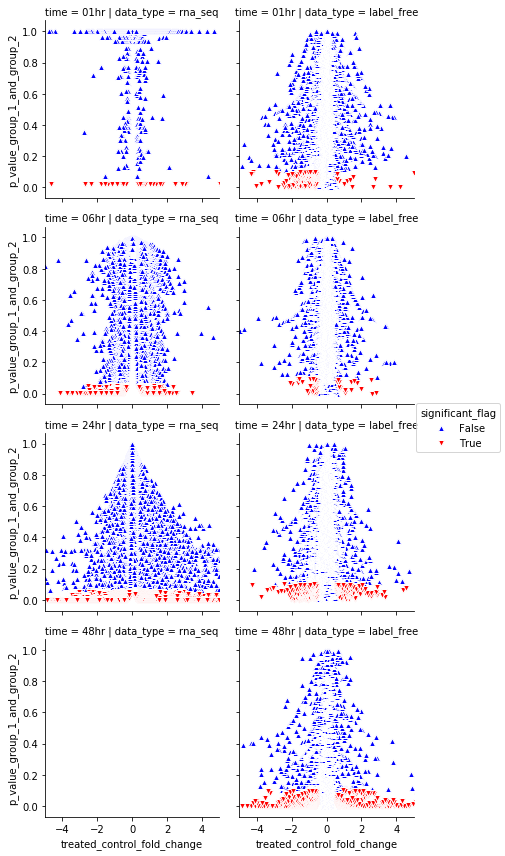

In [5]:
data = exp_data.data.copy()
data = data[data['data_type'].isin(['label_free', 'rna_seq'])]
data = log2_normalize_df(data, 'treated_control_fold_change')

grid = sns.FacetGrid(data, col="data_type", row='time', 
                     row_order=['01hr', '06hr', '24hr', '48hr' ],
                     hue='significant_flag',
                     hue_kws=dict(marker=["^", "v"], color=['blue', 'red']),
                    )

grid.map(plt.scatter, 
         "treated_control_fold_change", 
         "p_value_group_1_and_group_2", 
         marker="o",
         edgecolor="w",
        ).add_legend()

grid.set(xlim=(-5, 5))

plt.savefig('compare_fc_across_sample.png', dpi=300)

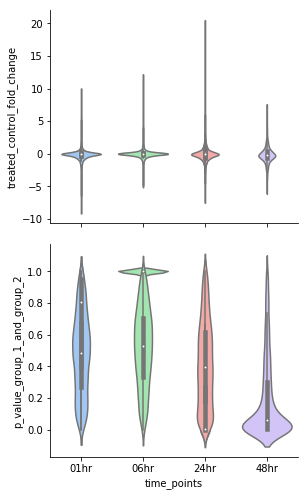

In [6]:
g = sns.PairGrid(data,
                 x_vars=['time_points'],
                 y_vars=[ "treated_control_fold_change", "p_value_group_1_and_group_2"],
                 hue="data_type",
                 aspect=1.25, size=3.5)
g.map(sns.violinplot, palette="pastel", 
                 split=True,);
g.fig.savefig('violin_plot-lf_rna_over_time.png', dpi=300)

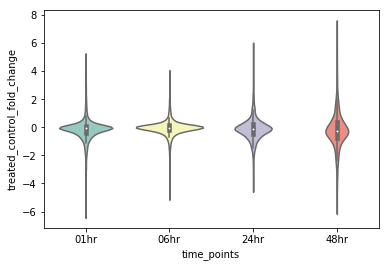

In [7]:

lf = data[data['data_type']=='label_free']
g = sns.violinplot(x="time_points", y="treated_control_fold_change", data=lf,
                   palette="Set3",order=sorted(data['time_points'].unique()) )

plt.savefig("violin_plot.png", dpi=300)

In [8]:
d = exp_data.data.copy()

In [9]:
met = d[d['data_type'].isin(['HILIC', 'C18'])].copy()
proteins = d[d['data_type'].isin(['label_free', 'silac', 'ph_silac'])].copy()
rna_seq = d[d['data_type'] == 'rna_seq'].copy()

time_points                                    01hr       06hr       24hr  \
name                                                                        
Glu-Thr                                    16.60964  16.609640 -16.609640   
Glutathione, oxidized                      16.60964   4.528571 -16.609640   
5-Phospho-D-ribose 1-diphosphate           16.60964   1.584963  16.609640   
Adenosine 5'-monophosphate                 16.60964   1.400538 -16.609640   
Uridine diphosphate-N-acetylgalactosamine  16.60964   1.306766 -11.626748   
2'-Deoxyguanosine                          16.60964   1.280956  -5.089583   
Uridine 5'-diphosphate                     16.60964   1.187033 -11.626748   
S-Adenosyl-L-methionine                    16.60964   0.925999 -16.609640   
N-Acetyl-D-lactosamine                     16.60964   0.536053 -16.609640   
LysoPC(22:5(4Z,7Z,10Z,13Z,16Z))            16.60964  -0.847997  -6.643856   

time_points                                     48hr  
name                

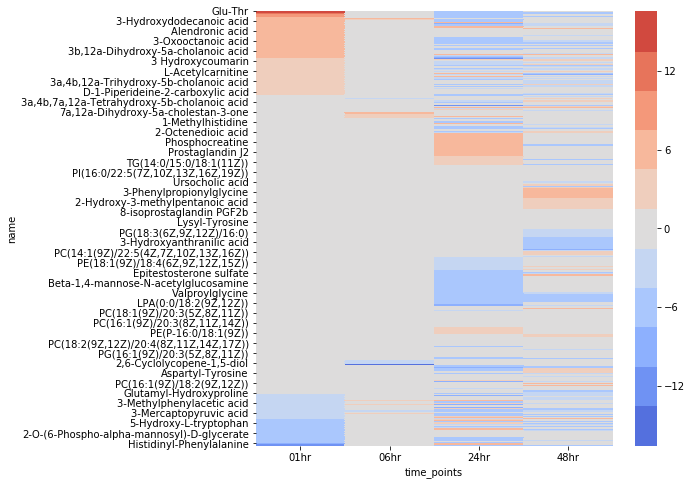

In [10]:
fig = heatmap_from_array(met, cluster_row=False, convert_to_log=True, 
                         index='name', values='treated_control_fold_change', 
                         columns='time_points', div_colors=True, fig_size=(8, 8), num_colors=11)

time_points                                    01hr      06hr      24hr  \
protein                                                                   
HSF5_S(ph)532_S(ph)540_S(ph)546_phsilac    3.321928  3.321928  3.321928   
ATP10B_S(ph)453_Y(ph)455_S(ph)456_phsilac  3.321928  3.321928  0.000000   
SFI1_Y(ph)151_Y(ph)152_phsilac             3.321928  3.321928  0.000000   
METAP2_74_98_phsilac                       3.321928  3.321928 -3.321928   
APOC3_45_60_phsilac                        3.321928  2.558045  3.321928   
USP15_N-term A(ace)2_lf                    3.321928  0.226509  0.454176   
PACS1_lf                                   3.321928  0.137504 -0.201634   
AIM1L_(ca)_112_119_phsilac                 3.321928  0.000000  0.000000   
AKAP13_S(ph)1977_phsilac                   3.321928  0.000000  0.000000   
AMN1_S(ph)175_S(ph)180_phsilac             3.321928  0.000000  0.000000   

time_points                                    48hr  
protein                                      

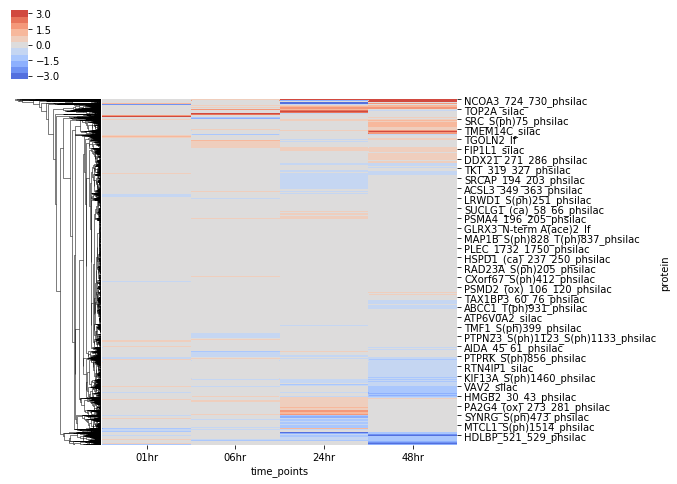

In [11]:
proteins.loc[proteins['treated_control_fold_change']>10, 'treated_control_fold_change']=10
proteins.loc[proteins['treated_control_fold_change']<-10, 'treated_control_fold_change']=-10

fig = heatmap_from_array(proteins, cluster_row=True, convert_to_log=True, 
                         index='protein', values='treated_control_fold_change', 
                         columns='time_points', div_colors=True, fig_size=(8, 8),  num_colors=11)

fig.fig.savefig('proteins_clustered_time.png', dpi=250, bbox_inches='tight')

time_points              01hr  06hr      24hr
protein                                      
GRIK4_3p_UTR_rnaseq   6.27716   0.0  0.000000
GRIK4_rnaseq          6.27716   0.0  0.000000
AL035209.1_rnaseq     5.03780   0.0  5.787050
C1orf132_rnaseq       5.03780   0.0  5.787050
MIR29B2_rnaseq        5.03780   0.0  5.787050
CH507-513H4.3_rnaseq  3.06861   0.0  0.000000
CELSR3_rnaseq         3.01942   0.0  0.000000
MIR4793_rnaseq        3.01942   0.0  0.000000
RPL23A_rnaseq         2.87402   0.0  0.707893
SNORD42A_rnaseq       2.87402   0.0  0.707893


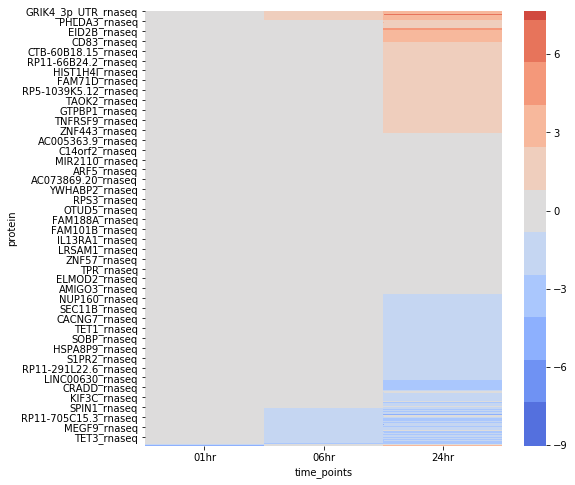

In [12]:
sig_rna = rna_seq[rna_seq['significant_flag']]
fig = heatmap_from_array(sig_rna, convert_to_log=True, cluster_row=False, 
                         index='protein', values='treated_control_fold_change', 
                         columns='time_points', div_colors=True, fig_size=(8, 8), num_colors=11)

In [13]:
create_venn2(exp_data.list_rna, exp_data.list_proteins_non_rna, 
             'RNA', 'Protein', 'venn_rna_and_protein')

In [14]:
proteins = d[d['data_type'].isin(['label_free', 'silac', 'ph_silac'])].copy()

pivot = pivot_table(proteins, False, 
                    index='protein', 
                    values='treated_control_fold_change', 
                    columns='time_points')

sig = pivot_table(proteins[proteins['significant_flag']], 
                  False, 
                  index='protein', 
                  values='treated_control_fold_change', 
                  columns='time_points' 
                 )
sig = (sig[['01hr','06hr', '24hr', '48hr' ]].T==0.).sum()
pivot = (pivot[['01hr','06hr', '24hr', '48hr' ]].T==0.).sum()


pivot = pivot[pivot<1]
sig = sig[sig<2]

criteria = set(pivot.index.values).intersection(sig.index.values)
tmp = proteins[proteins['protein'].isin(criteria)]
print(tmp.shape)



(17016, 12)


time_points                                   01hr      06hr      24hr  48hr
protein                                                                     
BRCA1_824_830_phsilac                     7.146627  0.000000  0.000000   0.0
WISP1_Y(ph)313_phsilac                    6.070870  0.000000  0.000000   0.0
ECHS1_Y(ph)112_S(ph)113_S(ph)114_phsilac  5.532291  0.000000  0.000000   0.0
CUL4B_902_913_phsilac                     4.948087  0.000000  0.000000   0.0
AKAP13_S(ph)1977_phsilac                  4.837046  0.000000  0.000000   0.0
SFI1_Y(ph)151_Y(ph)152_phsilac            4.722575  4.227202  0.000000   0.0
HSF5_S(ph)532_phsilac                     4.715846  0.000000  0.000000   0.0
FAM131C_S(ph)3_phsilac                    4.664197  0.000000  0.000000   0.0
AIM1L_(ca)_112_119_phsilac                4.451023  0.000000  0.000000   0.0
ANO5_T(ph)245_Y(ph)257_phsilac            4.444667 -5.356320  5.655524   0.0


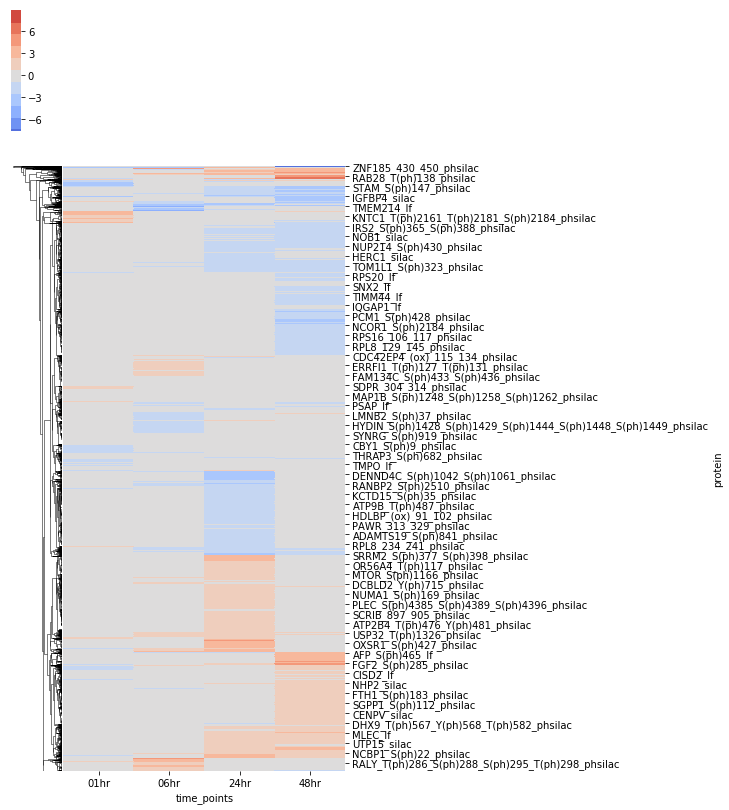

In [15]:
fig = heatmap_from_array(tmp, 
                         cluster_row=True, 
                         convert_to_log=True, 
                         index='protein', 
                         values='treated_control_fold_change', 
                         columns='time_points',
                         div_colors=True, 
                         fig_size=(6,14), 
                         num_colors=11)

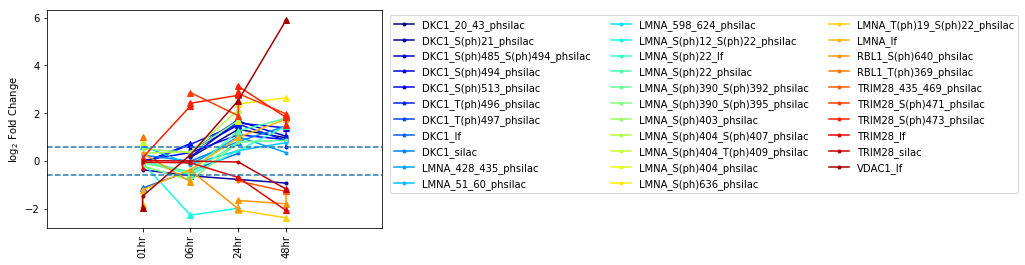

In [16]:
plot_list_of_genes(tmp, ['VDAC1', 'TRIM28', 'LMNA', 'RBL1','DKC1'], plot_type='matplotlib', 
                   save_name='proteins_timecour_example', 
                   image_format='png'
                  )